In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [ ]:
import openpyxl
print(openpyxl.__version__)

3.1.5


In [13]:
ttc = pd.read_excel(r'C:\Users\irene\DSI\ttc-streetcar-delay-data-2024.xlsx')
ttc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,2024-01-01,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,2024-01-01,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,2024-01-01,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,2024-01-01,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,2024-01-01,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
14201,2024-12-31,505,22:14,Tuesday,DUNDAS AND SPADINA,Security,0,0,W,4522
14202,2024-12-31,506,22:32,Tuesday,CARLTON AND JARVIS,General Delay,0,0,NaN,0
14203,2024-12-31,501,00:42,Tuesday,QUEEN AND RONCESVALLES,Security,0,0,W,4438
14204,2024-12-31,511,00:52,Tuesday,QUEENS QUAY AND HARBOU,Cleaning - Unsanitary,10,20,N,4530


In [ ]:
# inspecting data set: checking data types, if there's any null entries
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14206 non-null  datetime64[ns]
 1   Line       14050 non-null  object        
 2   Time       14206 non-null  object        
 3   Day        14206 non-null  object        
 4   Location   14205 non-null  object        
 5   Incident   14206 non-null  object        
 6   Min Delay  14206 non-null  int64         
 7   Min Gap    14206 non-null  int64         
 8   Bound      12078 non-null  object        
 9   Vehicle    14206 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.1+ MB


In [ ]:
# checking first 5 rows
ttc.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,2024-01-01,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,2024-01-01,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,2024-01-01,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,2024-01-01,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,2024-01-01,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116


In [ ]:
# getting the distinctive incident categories
ttc['Incident'].unique()

array(['Security', 'Emergency Services', 'Diversion', 'General Delay',
       'Held By', 'Operations', 'Mechanical', 'Collision - TTC Involved',
       'Cleaning - Unsanitary', 'Investigation', 'Rail/Switches',
       'Utilized Off Route', 'Overhead'], dtype=object)

In [23]:
# out of 14206 entries, how many incidents are each category?
ttc['Incident'].value_counts()

Incident
Operations                  2281
Security                    1881
General Delay               1762
Diversion                   1712
Mechanical                  1683
Cleaning - Unsanitary       1360
Emergency Services          1350
Held By                      740
Collision - TTC Involved     679
Utilized Off Route           331
Investigation                218
Rail/Switches                148
Overhead                      61
Name: count, dtype: int64

In [ ]:
# getting the fractions of each incident category
ttc['Incident'].value_counts(normalize = True)

Incident
Operations                  0.160566
Security                    0.132409
General Delay               0.124032
Diversion                   0.120512
Mechanical                  0.118471
Cleaning - Unsanitary       0.095734
Emergency Services          0.095030
Held By                     0.052091
Collision - TTC Involved    0.047797
Utilized Off Route          0.023300
Investigation               0.015346
Rail/Switches               0.010418
Overhead                    0.004294
Name: proportion, dtype: float64

In [31]:
# getting the % of each incident category
100 * ttc.groupby('Incident').size() / ttc.shape[0]

Incident
Cleaning - Unsanitary        9.573420
Collision - TTC Involved     4.779671
Diversion                   12.051246
Emergency Services           9.503027
General Delay               12.403210
Held By                      5.209067
Investigation                1.534563
Mechanical                  11.847107
Operations                  16.056596
Overhead                     0.429396
Rail/Switches                1.041813
Security                    13.240884
Utilized Off Route           2.330001
dtype: float64

In [34]:
# found a few missing null values: 156 lines, 1 location, 2128 bounds
ttc.isnull().sum()

Date            0
Line          156
Time            0
Day             0
Location        1
Incident        0
Min Delay       0
Min Gap         0
Bound        2128
Vehicle         0
dtype: int64

In [40]:
# dropping the null values; then double checking to see if we have anymore null values
ttc_clean = ttc.dropna()
ttc_clean.isna().sum()

Date         0
Line         0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Bound        0
Vehicle      0
dtype: int64

In [ ]:
# deciding to fill null values with 'Unknown' since my Date & Day columns won't be affected by these null values
ttc = ttc.fillna({'Location': 'Unknown', 'Bound': 'Unknown', 'Line': 'Unknown'})

In [52]:
# double checking if there's null values
ttc.isnull().sum()

Date         0
Line         0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Bound        0
Vehicle      0
dtype: int64

In [ ]:
# 2. converting Date column '01-Jan-24' string format to datetime format
ttc['Date'] = pd.to_datetime(ttc['Date'])
ttc['Date']

0       2024-01-01
1       2024-01-01
2       2024-01-01
3       2024-01-01
4       2024-01-01
           ...    
14201   2024-12-31
14202   2024-12-31
14203   2024-12-31
14204   2024-12-31
14205   2024-12-31
Name: Date, Length: 14206, dtype: datetime64[ns]

In [58]:
# 2. changing the Day format from 'Monday' string to 'Monday' to weekday format
ttc['Day'] = ttc['Date'].dt.day_name()
ttc['Day']

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
          ...   
14201    Tuesday
14202    Tuesday
14203    Tuesday
14204    Tuesday
14205    Tuesday
Name: Day, Length: 14206, dtype: object

In [64]:
# 2. Sorting data frame by Date chronologically, in case data was entered randomly
ttc = ttc.sort_values('Date')
ttc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,2024-01-01,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
34,2024-01-01,512,11:01,Monday,ST CLAIR STATION,Collision - TTC Involved,7,14,S,3367
35,2024-01-01,507,11:15,Monday,RONCESVALLES YARD,General Delay,5,17,Unknown,4485
36,2024-01-01,505,11:30,Monday,DUNDAS AND CHURCH,Security,10,20,E,4498
37,2024-01-01,512,12:38,Monday,ST CLAIR AND BATHURST,Collision - TTC Involved,6,12,W,8703
...,...,...,...,...,...,...,...,...,...,...
14180,2024-12-31,505,11:35,Tuesday,BROADVIEW STATION,Emergency Services,10,20,Unknown,4469
14169,2024-12-31,504,05:25,Tuesday,LESLIE BARNS CARHOUSE,Operations,10,20,Unknown,4431
14182,2024-12-31,506,11:50,Tuesday,GERRARD AND RIVER,Diversion,36,46,W,4411
14178,2024-12-31,506,09:33,Tuesday,COLLEGE AND BATHURST,Security,0,0,W,4559


In [ ]:
# grouping all rows with same incident and same date here, 
# counting it, converting back to DataFrame, 
# then naming a new column as 'Count'
daily_counts = ttc.groupby(['Date', 'Incident']).size().reset_index(name='Count')
daily_counts

,Date,Incident,Count
0,2024-01-01,Cleaning - Unsanitary,3
1,2024-01-01,Collision - TTC Involved,2
2,2024-01-01,Diversion,8
3,2024-01-01,Emergency Services,8
4,2024-01-01,General Delay,16
...,...,...,...
3574,2024-12-31,Mechanical,1
3575,2024-12-31,Operations,9
3576,2024-12-31,Rail/Switches,1
3577,2024-12-31,Security,8


In [70]:
# grouping rows that had the same day and same incident category, 
# counting it, converting into DataFrame, 
# then naming a new column 'Count' with the numbers
weekday_counts = ttc.groupby(['Day', 'Incident']).size().reset_index(name='Count')
weekday_counts

,Day,Incident,Count
0,Friday,Cleaning - Unsanitary,200
1,Friday,Collision - TTC Involved,98
2,Friday,Diversion,228
3,Friday,Emergency Services,197
4,Friday,General Delay,267
...,...,...,...
86,Wednesday,Operations,301
87,Wednesday,Overhead,7
88,Wednesday,Rail/Switches,26
89,Wednesday,Security,289


<Axes: xlabel='Date', ylabel='Count'>

c:\Users\irene\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\irene\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


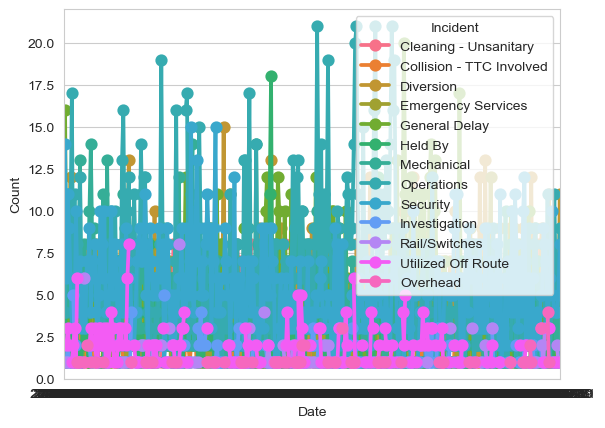

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.pointplot(data = daily_counts,
             x='Date',
             y='Count',
             hue='Incident')
fig, ax

<Axes: xlabel='Date', ylabel='Count'>

c:\Users\irene\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\irene\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


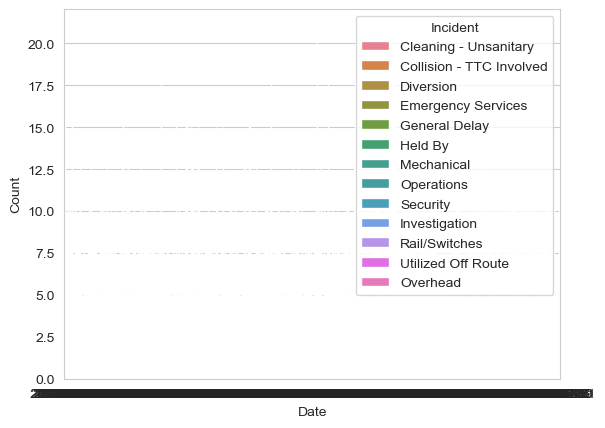

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.barplot(data = daily_counts,
             x='Date',
             y='Count',
             hue='Incident')

<Axes: xlabel='Date', ylabel='Count'>

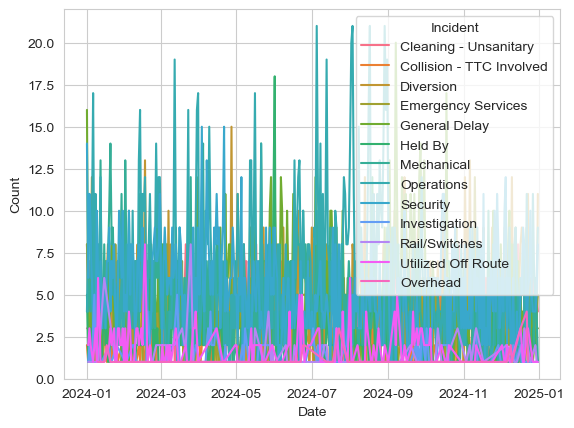

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.lineplot(data = daily_counts,
             x='Date',
             y='Count',
             hue='Incident')

# 6 panel plots = 6 groups of incident categories (by human vs. ___)
# total incident frequency vs. date

<Axes: xlabel='Day', ylabel='Count'>

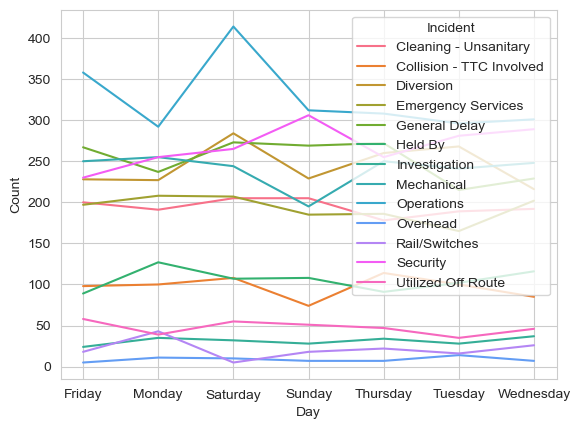

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = weekday_counts,
             x='Day',
             y='Count',
             hue='Incident')
